In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from glob import glob
import matplotlib
import matplotlib.pyplot as plt

In [2]:
plt.rcParams.update({'font.size': 18})
colors = matplotlib.rcParams['axes.prop_cycle'].by_key()['color']

In [10]:
pf = pd.read_hdf('results/2019Sept12/out_data_ALL.h5', 'pf')
lpt = pd.read_hdf('results/2019Sept12/out_data_ALL.h5', 'lpt')

pf_res = pd.read_hdf('results/2019Sept12/BToKJpsi_Toee.h5', 'pf')
lpt_res = pd.read_hdf('results/2019Sept12/BToKJpsi_Toee.h5', 'lpt')

pf_nres = pd.read_hdf('results/2019Sept12/BToKee.h5', 'pf')
lpt_nres = pd.read_hdf('results/2019Sept12/BToKee.h5', 'lpt')

In [11]:
def selection(df):
    return df[
        (df.kpt > 3) & (df.kDCA > 2)
    ]

In [12]:
pf  = selection(pf)
lpt = selection(lpt)

pf_res  = selection(pf_res)
lpt_res = selection(lpt_res)

pf_nres  = selection(pf_nres)
lpt_nres = selection(lpt_nres)

# compatibility between ntuples
pf_res = pf_res[(pf_res.kpt > 3) & (pf_res.kDCA > 2)]
lpt_res = lpt_res[(lpt_res.kpt > 3) & (lpt_res.kDCA > 2)]

pf_nres = pf_nres[(pf_nres.kpt > 3) & (pf_nres.kDCA > 2)]
lpt_nres = lpt_nres[(lpt_nres.kpt > 3) & (lpt_nres.kDCA > 2)]

pf = pf[(pf.Bmll < 3.25) & (pf.Bmll > 2.75)]
lpt = lpt[(lpt.Bmll < 3.25) & (lpt.Bmll > 2.75)]

In [4]:
def fequency(arr, bins=10, rangex=None, normed=None, weights=None, density=None,
            **kwargs):
    content, edges = np.histogram(
        arr, bins = bins, range = rangex, normed = normed, 
        weights = weights, density = density
    )
    if 'fmt' not in kwargs:
        kwargs['fmt'] = 'o'
    centers = (edges[:-1] + edges[1:]) / 2
    errs = np.sqrt(content) # TODO: add frequentist asymmetric errors    
    plt.errorbar(centers, content, yerr = errs, **kwargs)
    return centers, content, errs

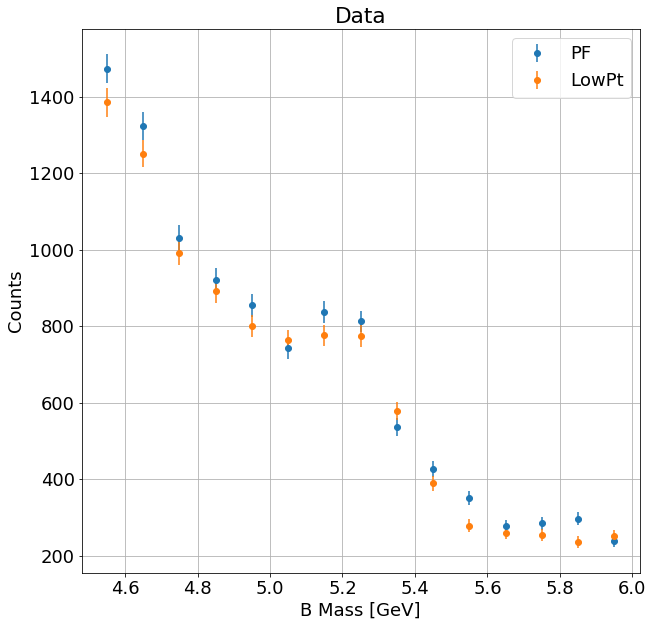

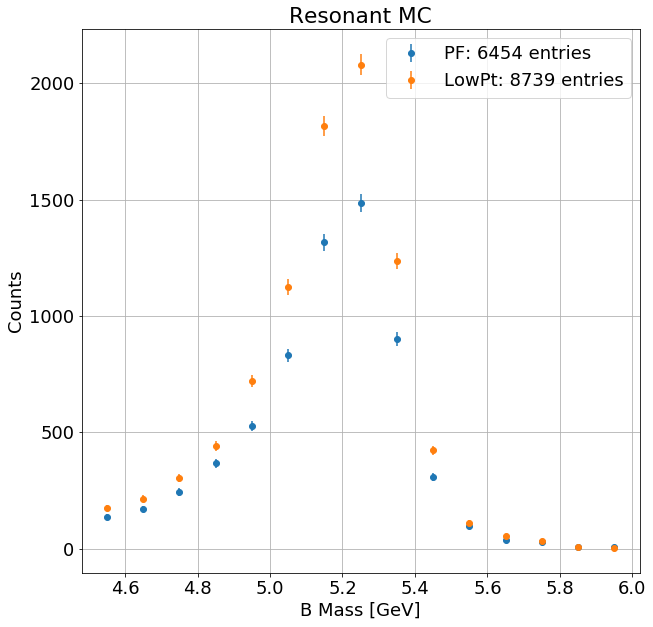

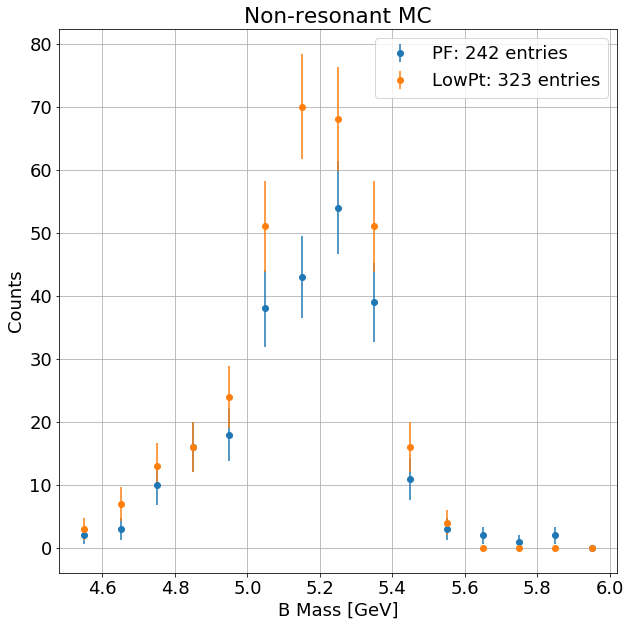

In [13]:
for name, pf_df, lpt_df in [('Data', pf, lpt), ('Resonant MC', pf_res, lpt_res), 
                            ('Non-resonant MC', pf_nres, lpt_nres),]:
    plt.figure(figsize=(10, 10))
    fequency(pf_df.Bmass, bins = 15, 
             label = 'PF' if name == 'Data' else f'PF: {pf_df.shape[0]} entries', 
             rangex = (4.5, 6.), fmt = 'o', c = colors[0])
    fequency(lpt_df.Bmass, bins = 15, 
             label = 'LowPt' if name == 'Data' else f'LowPt: {lpt_df.shape[0]} entries', 
             rangex = (4.5, 6.), fmt = 'o', c = colors[1])
    plt.xlabel('B Mass [GeV]')
    plt.ylabel('Counts')
    plt.legend(loc = 'best')
    plt.title(name)
    plt.grid()

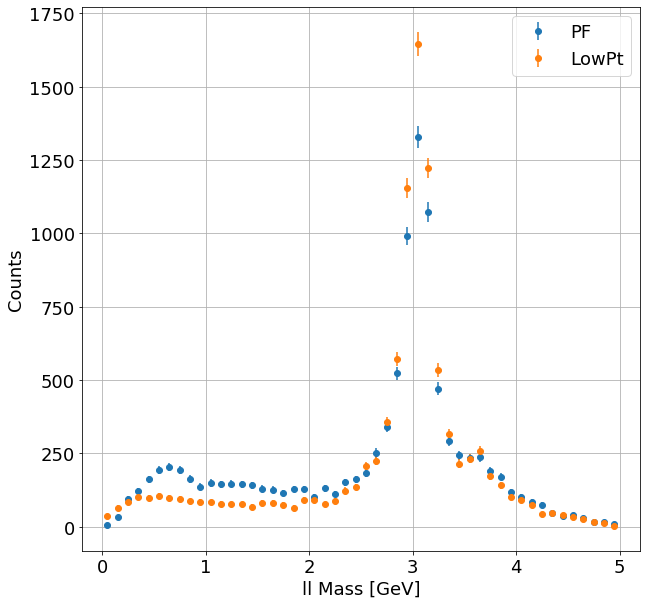

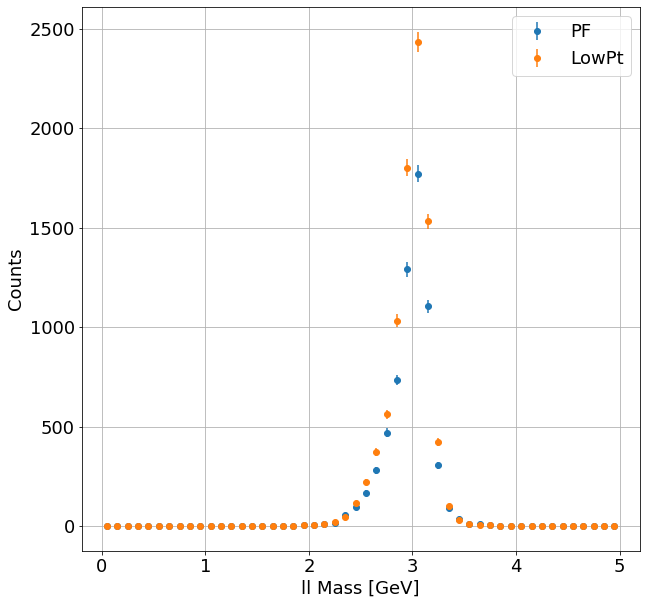

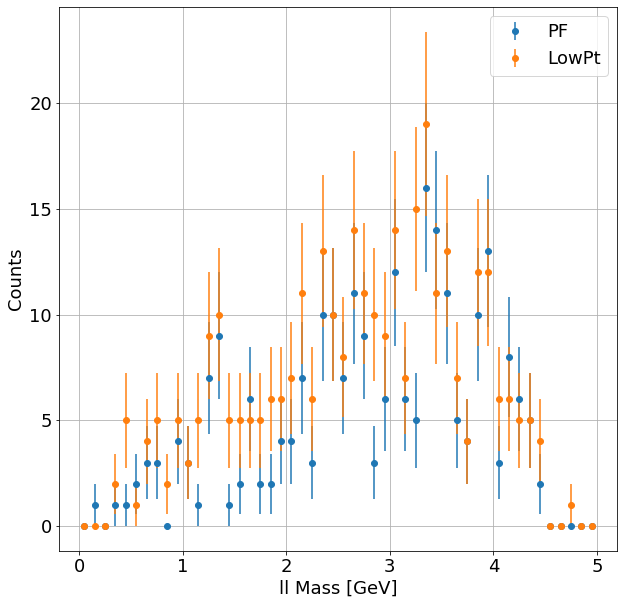

In [14]:
for name, pf_df, lpt_df in [('Data', pf, lpt), ('Resonant MC', pf_res, lpt_res), 
                            ('Non-resonant MC', pf_nres, lpt_nres),]:
    plt.figure(figsize=(10, 10))
    fequency(pf_df.Bmll, bins = 50, label = 'PF', rangex = (0, 5))
    fequency(lpt_df.Bmll, bins = 50, label = 'LowPt', rangex = (0, 5))
    plt.xlabel('ll Mass [GeV]')
    plt.ylabel('Counts')
    plt.legend(loc = 'best')
    plt.grid()

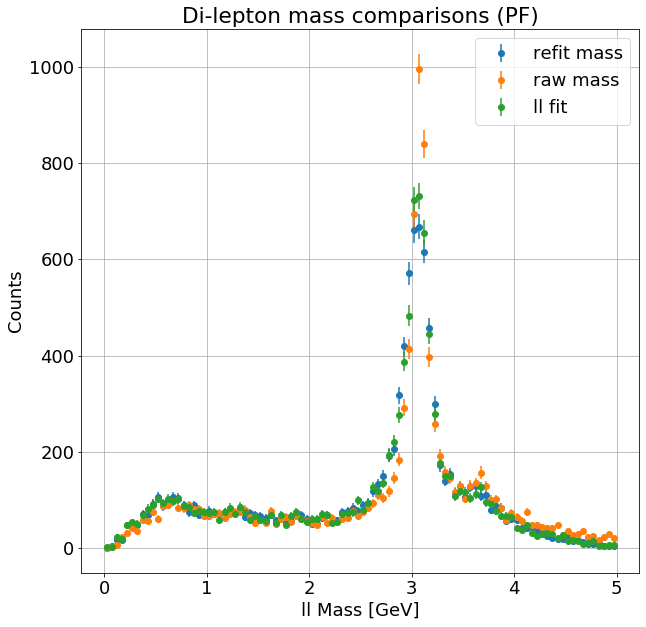

In [15]:
plt.figure(figsize=(10, 10))
fequency(pf.Bmll, bins = 100, label = 'refit mass', rangex = (0, 5))
fequency(pf.Bmll_raw, bins = 100, label = 'raw mass', rangex = (0, 5))
fequency(pf.Bmll_llfit, bins = 100, label = 'll fit', rangex = (0, 5))
plt.xlabel('ll Mass [GeV]')
plt.ylabel('Counts')
plt.legend(loc = 'best')
plt.title('Di-lepton mass comparisons (PF)')
plt.grid()

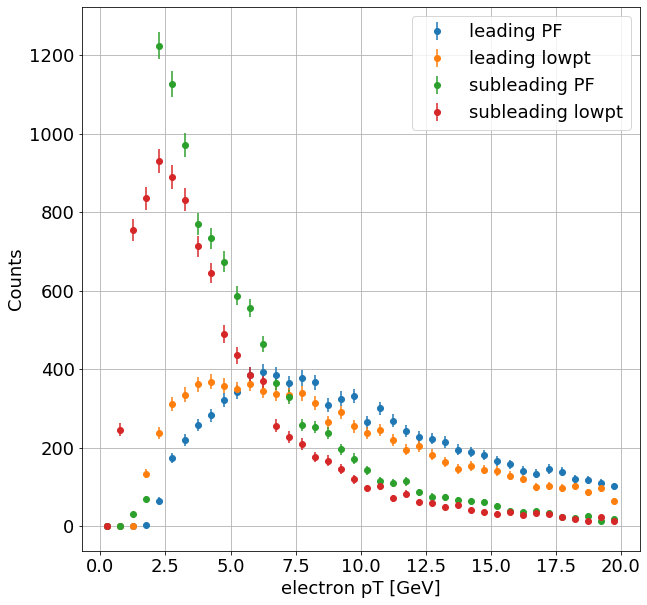

In [16]:
plt.figure(figsize=(10, 10))
fequency(pf.e1pt, bins = 40, label = 'leading PF', rangex = (0, 20))
fequency(lpt.e1pt, bins = 40, label = 'leading lowpt', rangex = (0, 20))
fequency(pf.e2pt, bins = 40, label = 'subleading PF', rangex = (0, 20))
fequency(lpt.e2pt, bins = 40, label = 'subleading lowpt', rangex = (0, 20))
plt.xlabel('electron pT [GeV]')
plt.ylabel('Counts')
plt.legend(loc = 'best')
#plt.title('Di-lepton mass comparisons (LowPt)')
plt.grid()

In [17]:
import sys
sys.executable

'/afs/cern.ch/work/m/mverzett/miniconda3/envs/pyrk/bin/python'

In [18]:
import tensorflow as tf

import zfit
# Wrapper for some tensorflow functionality
from zfit import ztf

W0917 17:29:33.116289 140242063673152 deprecation_wrapper.py:119] From /afs/cern.ch/work/m/mverzett/miniconda3/envs/pyrk/lib/python3.7/site-packages/zfit/util/execution.py:137: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0917 17:29:34.863773 140242063673152 deprecation_wrapper.py:119] From /afs/cern.ch/work/m/mverzett/miniconda3/envs/pyrk/lib/python3.7/site-packages/zfit/__init__.py:30: The name tf.get_variable_scope is deprecated. Please use tf.compat.v1.get_variable_scope instead.



In [19]:
mass = zfit.Space('m', limits=(4.5, 6))
mu = zfit.Parameter("mu", 5.2, 5., 5.4)
sigma = zfit.Parameter("sigma", 0.2, 0.05, 0.5)
alphal = zfit.Parameter("alphal", 1., 1, 3.)
cb_nl = zfit.Parameter("cb_nl", 0.5, 0.5, 6.)
alphar = zfit.Parameter("alphar", 1., 1, 3.)
cb_nr = zfit.Parameter("cb_nr", 0.5, 0.5, 6.)
yield_cb = zfit.Parameter("yield_cb", 0., 0., 10000000.)

W0917 17:29:36.417907 140242063673152 deprecation_wrapper.py:119] From /afs/cern.ch/work/m/mverzett/miniconda3/envs/pyrk/lib/python3.7/site-packages/zfit/core/parameter.py:339: The name tf.add_to_collection is deprecated. Please use tf.compat.v1.add_to_collection instead.



In [20]:
cb_pdf = zfit.pdf.DoubleCB(
    mu = mu, sigma = sigma, 
    alphal = alphal, nl = cb_nl, 
    alphar = alphar, nr = cb_nr, 
    obs = mass
)
cb = cb_pdf#.create_extended(yield_cb)

In [21]:
exp_lambda = zfit.Parameter("exp_lambda", -1, -10, -0.2)
yield_exp = zfit.Parameter("yield_exp", 0., 0., 10000000.)
exp_pdf = zfit.pdf.Exponential(exp_lambda, mass)
exp = exp_pdf#.create_extended(yield_exp)

In [22]:
ratio = zfit.Parameter("ratio", 0.1, 0., 1.)
pdf = exp + ratio * cb

W0917 17:29:37.309785 140242063673152 deprecation_wrapper.py:119] From /afs/cern.ch/work/m/mverzett/miniconda3/envs/pyrk/lib/python3.7/site-packages/zfit/core/parameter.py:640: The name tf.get_collection is deprecated. Please use tf.compat.v1.get_collection instead.



In [23]:
data = zfit.data.Data.from_numpy(obs = mass, array = pf.Bmass.values)
data_lpt = zfit.data.Data.from_numpy(obs = mass, array = lpt.Bmass.values)

data_res = zfit.data.Data.from_numpy(obs = mass, array = pf_res.Bmass.values)


W0917 17:29:37.329756 140242063673152 deprecation_wrapper.py:119] From /afs/cern.ch/work/m/mverzett/miniconda3/envs/pyrk/lib/python3.7/site-packages/zfit/core/data.py:285: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



In [24]:
rangex = (4.5, 6.)
bins = 15
x = np.linspace(*rangex, num = 1000)

In [25]:
nll = zfit.loss.UnbinnedNLL(model = pdf, data = data)
minimizer = zfit.minimize.MinuitMinimizer()
minimum = minimizer.minimize(loss = nll)

with pdf.set_norm_range(rangex):
    y = zfit.run(pdf.pdf(x))

with cb.set_norm_range(rangex):
    y1 = zfit.run(cb.pdf(x))

with exp.set_norm_range(rangex):
    y2 = zfit.run(exp.pdf(x))
#apply norm
norm = pf.Bmass.shape[0] / bins * (rangex[1] - rangex[0])
y = norm * y
y1 = norm * minimum.params[ratio]['value'] * y1
y2 = norm * (1 - minimum.params[ratio]['value']) * y2

pf_fit = {
    'pdf' : y,
    'cb' : y1,
    'exp' : y2,
}

print("PF Yield: ", norm * minimum.params[ratio]['value'])
unc = minimum.error()
yields = norm * minimum.params[ratio]['value'], \
    norm * unc[ratio].lower, \
    norm * unc[ratio].upper
pf_infos = [
    f'Yield: {yields[0]:.0f} {yields[1]:.0f}/+{yields[2]:.0f}',
    f"mu: {minimum.params[mu]['value']:.2f} {unc[mu].lower:.2f}/+{unc[mu].upper:.2f}",
    f"sigma: {minimum.params[sigma]['value']:.3f} {unc[sigma].lower:.3f}/+{unc[sigma].upper:.3f}",
]


W0917 17:29:37.451659 140242063673152 deprecation.py:323] From /afs/cern.ch/work/m/mverzett/miniconda3/envs/pyrk/lib/python3.7/site-packages/zfit/core/data.py:328: DatasetV1.make_initializable_iterator (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.
W0917 17:29:37.811424 140242063673152 deprecation.py:323] From /afs/cern.ch/work/m/mverzett/miniconda3/envs/pyrk/lib/python3.7/site-packages/tensorflow/python/ops/array_ops.py:1354: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0917 17:29:39.984347 14024206367

------------------------------------------------------------------
| FCN = 2680                    |     Ncalls=568 (568 total)     |
| EDM = 3.24E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
PF Yield:  54.50455764513288


In [26]:
nll = zfit.loss.UnbinnedNLL(model = pdf, data = data_lpt)
minimizer = zfit.minimize.MinuitMinimizer()
minimum = minimizer.minimize(loss = nll)

with pdf.set_norm_range(rangex):
    y = zfit.run(pdf.pdf(x))

with cb.set_norm_range(rangex):
    y1 = zfit.run(cb.pdf(x))

with exp.set_norm_range(rangex):
    y2 = zfit.run(exp.pdf(x))

#apply norm
norm = lpt.Bmass.shape[0] / bins * (rangex[1] - rangex[0])
y = norm * y
y1 = norm * minimum.params[ratio]['value'] * y1
y2 = norm * (1 - minimum.params[ratio]['value']) * y2
lpt_fit = {
    'pdf' : y,
    'cb' : y1,
    'exp' : y2,
}
unc = minimum.error()
yields = norm * minimum.params[ratio]['value'], \
    norm * unc[ratio].lower, \
    norm * unc[ratio].upper
lpt_infos = [
    f'Yield: {yields[0]:.0f} {yields[1]:.0f}/+{yields[2]:.0f}',
    f"mu: {minimum.params[mu]['value']:.2f} {unc[mu].lower:.2f}/+{unc[mu].upper:.2f}",
    f"sigma: {minimum.params[sigma]['value']:.3f} {unc[sigma].lower:.3f}/+{unc[sigma].upper:.3f}",
]


------------------------------------------------------------------
| FCN = 2473                    |     Ncalls=243 (243 total)     |
| EDM = 4.5E-05 (Goal: 5E-06)   |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------


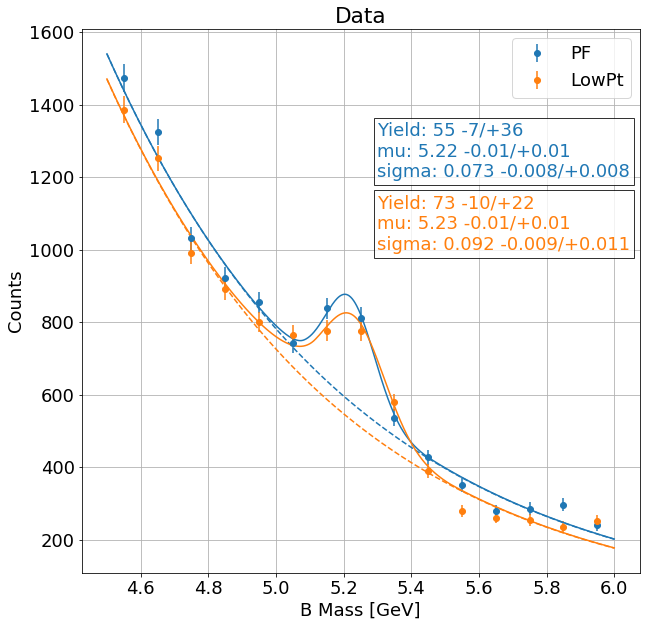

In [27]:
plt.figure(figsize=(10, 10))

fequency(
    pf.Bmass, bins = bins, label = 'PF', rangex = rangex, fmt = 'o', 
    c = colors[0]
)
fequency(
    lpt.Bmass, bins = bins, label = 'LowPt', rangex = rangex, fmt = 'o', 
    c = colors[1]
)

plt.plot(x, pf_fit['pdf'], ls = '-', c = colors[0])
plt.plot(x, pf_fit['exp'], ls = '--', c = colors[0])

plt.plot(x, lpt_fit['pdf'], ls = '-', c = colors[1])
plt.plot(x, lpt_fit['exp'], ls = '--', c = colors[1])

plt.text(
    5.3, 1200, '\n'.join(pf_infos), color = colors[0],
    bbox = dict(facecolor = 'w', alpha = 0.8)
)

plt.text(
    5.3, 1000, '\n'.join(lpt_infos), color = colors[1],
    bbox = dict(facecolor = 'w', alpha = 0.8)
)

plt.xlabel('B Mass [GeV]')
plt.ylabel('Counts')
plt.legend(loc = 'best')
plt.title("Data")
plt.grid()

In [28]:
print('DONE!')

DONE!


In [29]:
rangex = (2, 4)
bins = 20
x = np.linspace(*rangex, num = 1000)
norms = {
    'pf' : pf_res.shape[0] / bins * (rangex[1] - rangex[0]),
    'lpt' : lpt_res.shape[0] / bins * (rangex[1] - rangex[0]),
}

In [30]:
ll_mass = zfit.Space('ll_m', limits=(2., 4.))
ll_mu = zfit.Parameter("ll_mu", 3., 2., 4.)
ll_sigma = zfit.Parameter("ll_sigma", 0.2, 0.05, 0.5)
ll_alphal = zfit.Parameter("ll_alphal", 1., 0.5, 3.)
ll_cb_nl = zfit.Parameter("ll_cb_nl", 0.5, 0.5, 6.)
ll_alphar = zfit.Parameter("ll_alphar", 1., 1, 3.)
ll_cb_nr = zfit.Parameter("ll_cb_nr", 0.5, 0.5, 6.)


In [31]:
ll_cb = zfit.pdf.DoubleCB(
    mu = ll_mu, sigma = ll_sigma, 
    alphal = ll_alphal, nl = ll_cb_nl, 
    alphar = ll_alphar, nr = ll_cb_nr, 
    obs = ll_mass
)

In [32]:
zfit_data = {
    'pf_mll' : zfit.data.Data.from_numpy(obs = ll_mass, array = pf_res.Bmll.values),
    'pf_mll_raw' : zfit.data.Data.from_numpy(obs = ll_mass, array = pf_res.Bmll_raw.values),
    'pf_mll_lfit' : zfit.data.Data.from_numpy(obs = ll_mass, array = pf_res.Bmll_llfit.values),

    'lpt_mll' : zfit.data.Data.from_numpy(obs = ll_mass, array = lpt_res.Bmll.values),
    'lpt_mll_raw' : zfit.data.Data.from_numpy(obs = ll_mass, array = lpt_res.Bmll_raw.values),
    'lpt_mll_lfit' : zfit.data.Data.from_numpy(obs = ll_mass, array = lpt_res.Bmll_llfit.values),
}

In [33]:
info = {}
for name in zfit_data:
    print('fitting', name)
    nll = zfit.loss.UnbinnedNLL(model = ll_cb, data = zfit_data[name], fit_range = rangex)
    minimizer = zfit.minimize.MinuitMinimizer()
    minimum = minimizer.minimize(loss = nll)

    with ll_cb.set_norm_range(rangex):
        y = zfit.run(ll_cb.pdf(x))

    unc = minimum.error()
    info[name] = {
        'y' : y,
        'result' : minimum,
        'errs' : unc,
        'str' : '\n'.join([
            f"mu: {minimum.params[ll_mu]['value']:.2f} {unc[ll_mu].lower:.2f}/+{unc[ll_mu].upper:.2f}",
            f"sigma: {minimum.params[ll_sigma]['value']:.3f} {unc[ll_sigma].lower:.3f}/+{unc[ll_sigma].upper:.3f}",            
        ])
    }

fitting pf_mll
------------------------------------------------------------------
| FCN = -1805                   |     Ncalls=160 (160 total)     |
| EDM = 5.87E-06 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
fitting pf_mll_raw
------------------------------------------------------------------
| FCN = -3016                   |     Ncalls=206 (206 total)     |
| EDM = 6.39E-06 (Goal: 5E-0

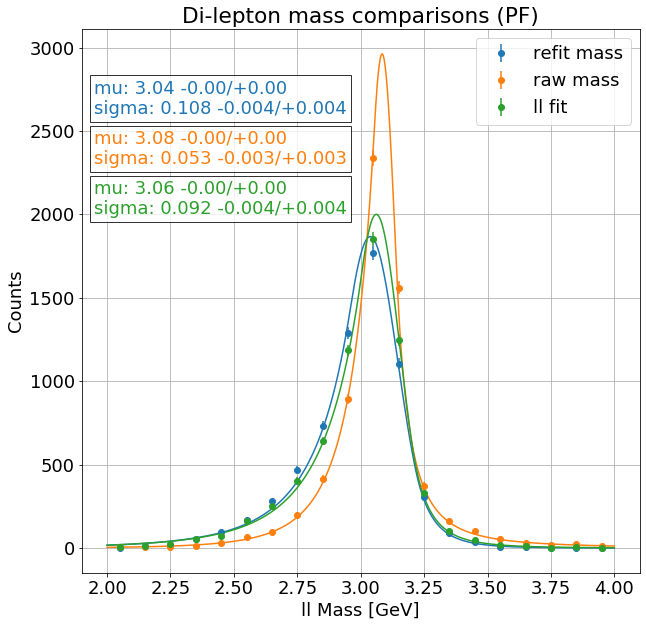

In [34]:
plt.figure(figsize=(10, 10))

fequency(pf_res.Bmll, bins = bins, label = 'refit mass', rangex = rangex)
fequency(pf_res.Bmll_raw, bins = bins, label = 'raw mass', rangex = rangex)
fequency(pf_res.Bmll_llfit, bins = bins, label = 'll fit', rangex = rangex)

plt.plot(x, norms['pf'] * info['pf_mll']['y'], c = colors[0])
plt.plot(x, norms['pf'] * info['pf_mll_raw']['y'], c = colors[1])
plt.plot(x, norms['pf'] * info['pf_mll_lfit']['y'], c = colors[2])

plt.text(
    1.95, 2600, info['pf_mll']['str'], color = colors[0],
    bbox = dict(facecolor = 'w', alpha = 0.8)
)
plt.text(
    1.95, 2300, info['pf_mll_raw']['str'], color = colors[1],
    bbox = dict(facecolor = 'w', alpha = 0.8)
)
plt.text(
    1.95, 2000, info['pf_mll_lfit']['str'], color = colors[2],
    bbox = dict(facecolor = 'w', alpha = 0.8)
)

plt.xlabel('ll Mass [GeV]')
plt.ylabel('Counts')
plt.legend(loc = 'best')
plt.title('Di-lepton mass comparisons (PF)')
plt.grid()

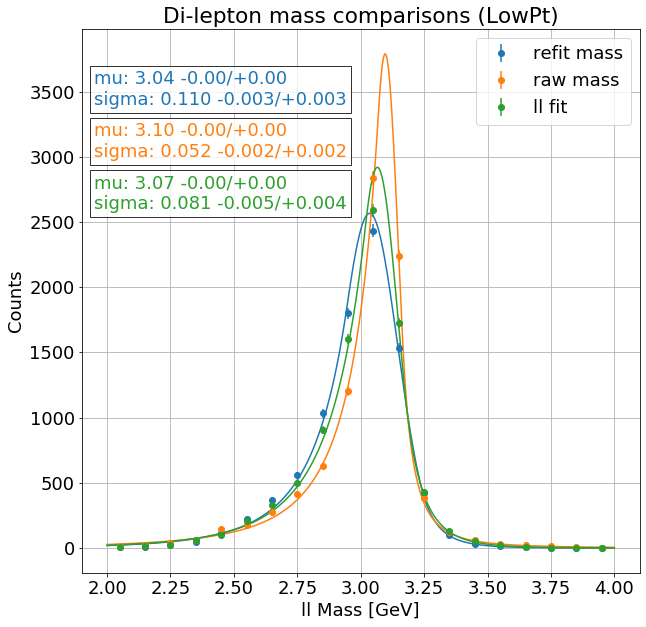

In [35]:
plt.figure(figsize=(10, 10))

fequency(lpt_res.Bmll, bins = bins, label = 'refit mass', rangex = rangex)
fequency(lpt_res.Bmll_raw, bins = bins, label = 'raw mass', rangex = rangex)
fequency(lpt_res.Bmll_llfit, bins = bins, label = 'll fit', rangex = rangex)

plt.plot(x, norms['lpt'] * info['lpt_mll']['y'], c = colors[0])
plt.plot(x, norms['lpt'] * info['lpt_mll_raw']['y'], c = colors[1])
plt.plot(x, norms['lpt'] * info['lpt_mll_lfit']['y'], c = colors[2])

plt.text(
    1.95, 3400, info['lpt_mll']['str'], color = colors[0],
    bbox = dict(facecolor = 'w', alpha = 0.8)
)
plt.text(
    1.95, 3000, info['lpt_mll_raw']['str'], color = colors[1],
    bbox = dict(facecolor = 'w', alpha = 0.8)
)
plt.text(
    1.95, 2600, info['lpt_mll_lfit']['str'], color = colors[2],
    bbox = dict(facecolor = 'w', alpha = 0.8)
)

plt.xlabel('ll Mass [GeV]')
plt.ylabel('Counts')
plt.legend(loc = 'best')
plt.title('Di-lepton mass comparisons (LowPt)')
plt.grid()